In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
# Load the data
df = pd.read_csv('../datasets/angles/angles_hand_gesture_data_20240915_145208.csv')

In [11]:
# 1. Data Overview
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5868 entries, 0 to 5867
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   angle_0   5868 non-null   float64
 1   angle_1   5868 non-null   float64
 2   angle_2   5868 non-null   float64
 3   angle_3   5868 non-null   float64
 4   angle_4   5868 non-null   float64
 5   angle_5   5868 non-null   float64
 6   angle_6   5868 non-null   float64
 7   angle_7   5868 non-null   float64
 8   angle_8   5868 non-null   float64
 9   angle_9   5868 non-null   float64
 10  angle_10  5868 non-null   float64
 11  angle_11  5868 non-null   float64
 12  angle_12  5868 non-null   float64
 13  angle_13  5868 non-null   float64
 14  angle_14  5868 non-null   float64
 15  gesture   5868 non-null   object 
dtypes: float64(15), object(1)
memory usage: 733.6+ KB
None
           angle_0      angle_1      angle_2      angle_3      angle_4  \
count  5868.000000  5868.000000  5868.000000  5868.000000

In [12]:
# Check for missing values
print(df.isnull().sum())

angle_0     0
angle_1     0
angle_2     0
angle_3     0
angle_4     0
angle_5     0
angle_6     0
angle_7     0
angle_8     0
angle_9     0
angle_10    0
angle_11    0
angle_12    0
angle_13    0
angle_14    0
gesture     0
dtype: int64


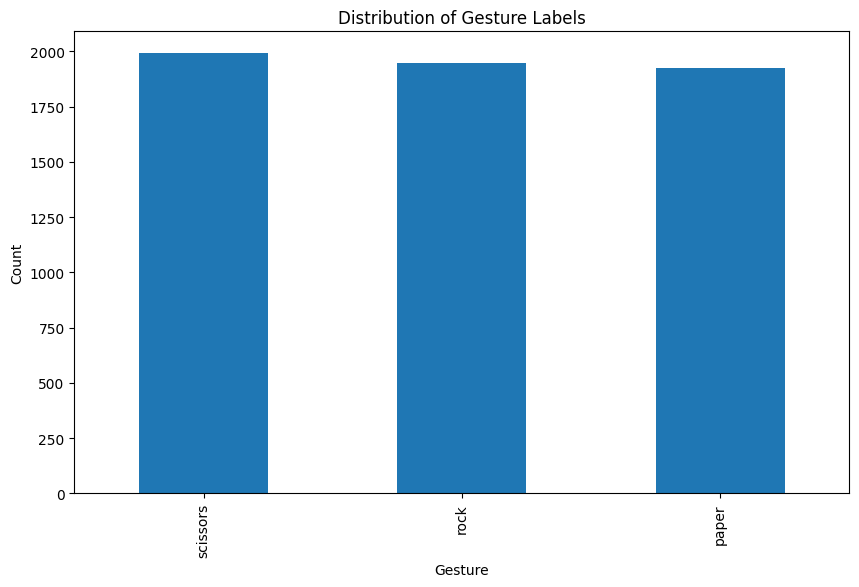

In [13]:
# 2. Gesture Distribution
plt.figure(figsize=(10, 6))
df['gesture'].value_counts().plot(kind='bar')
plt.title('Distribution of Gesture Labels')
plt.xlabel('Gesture')
plt.ylabel('Count')
plt.show()

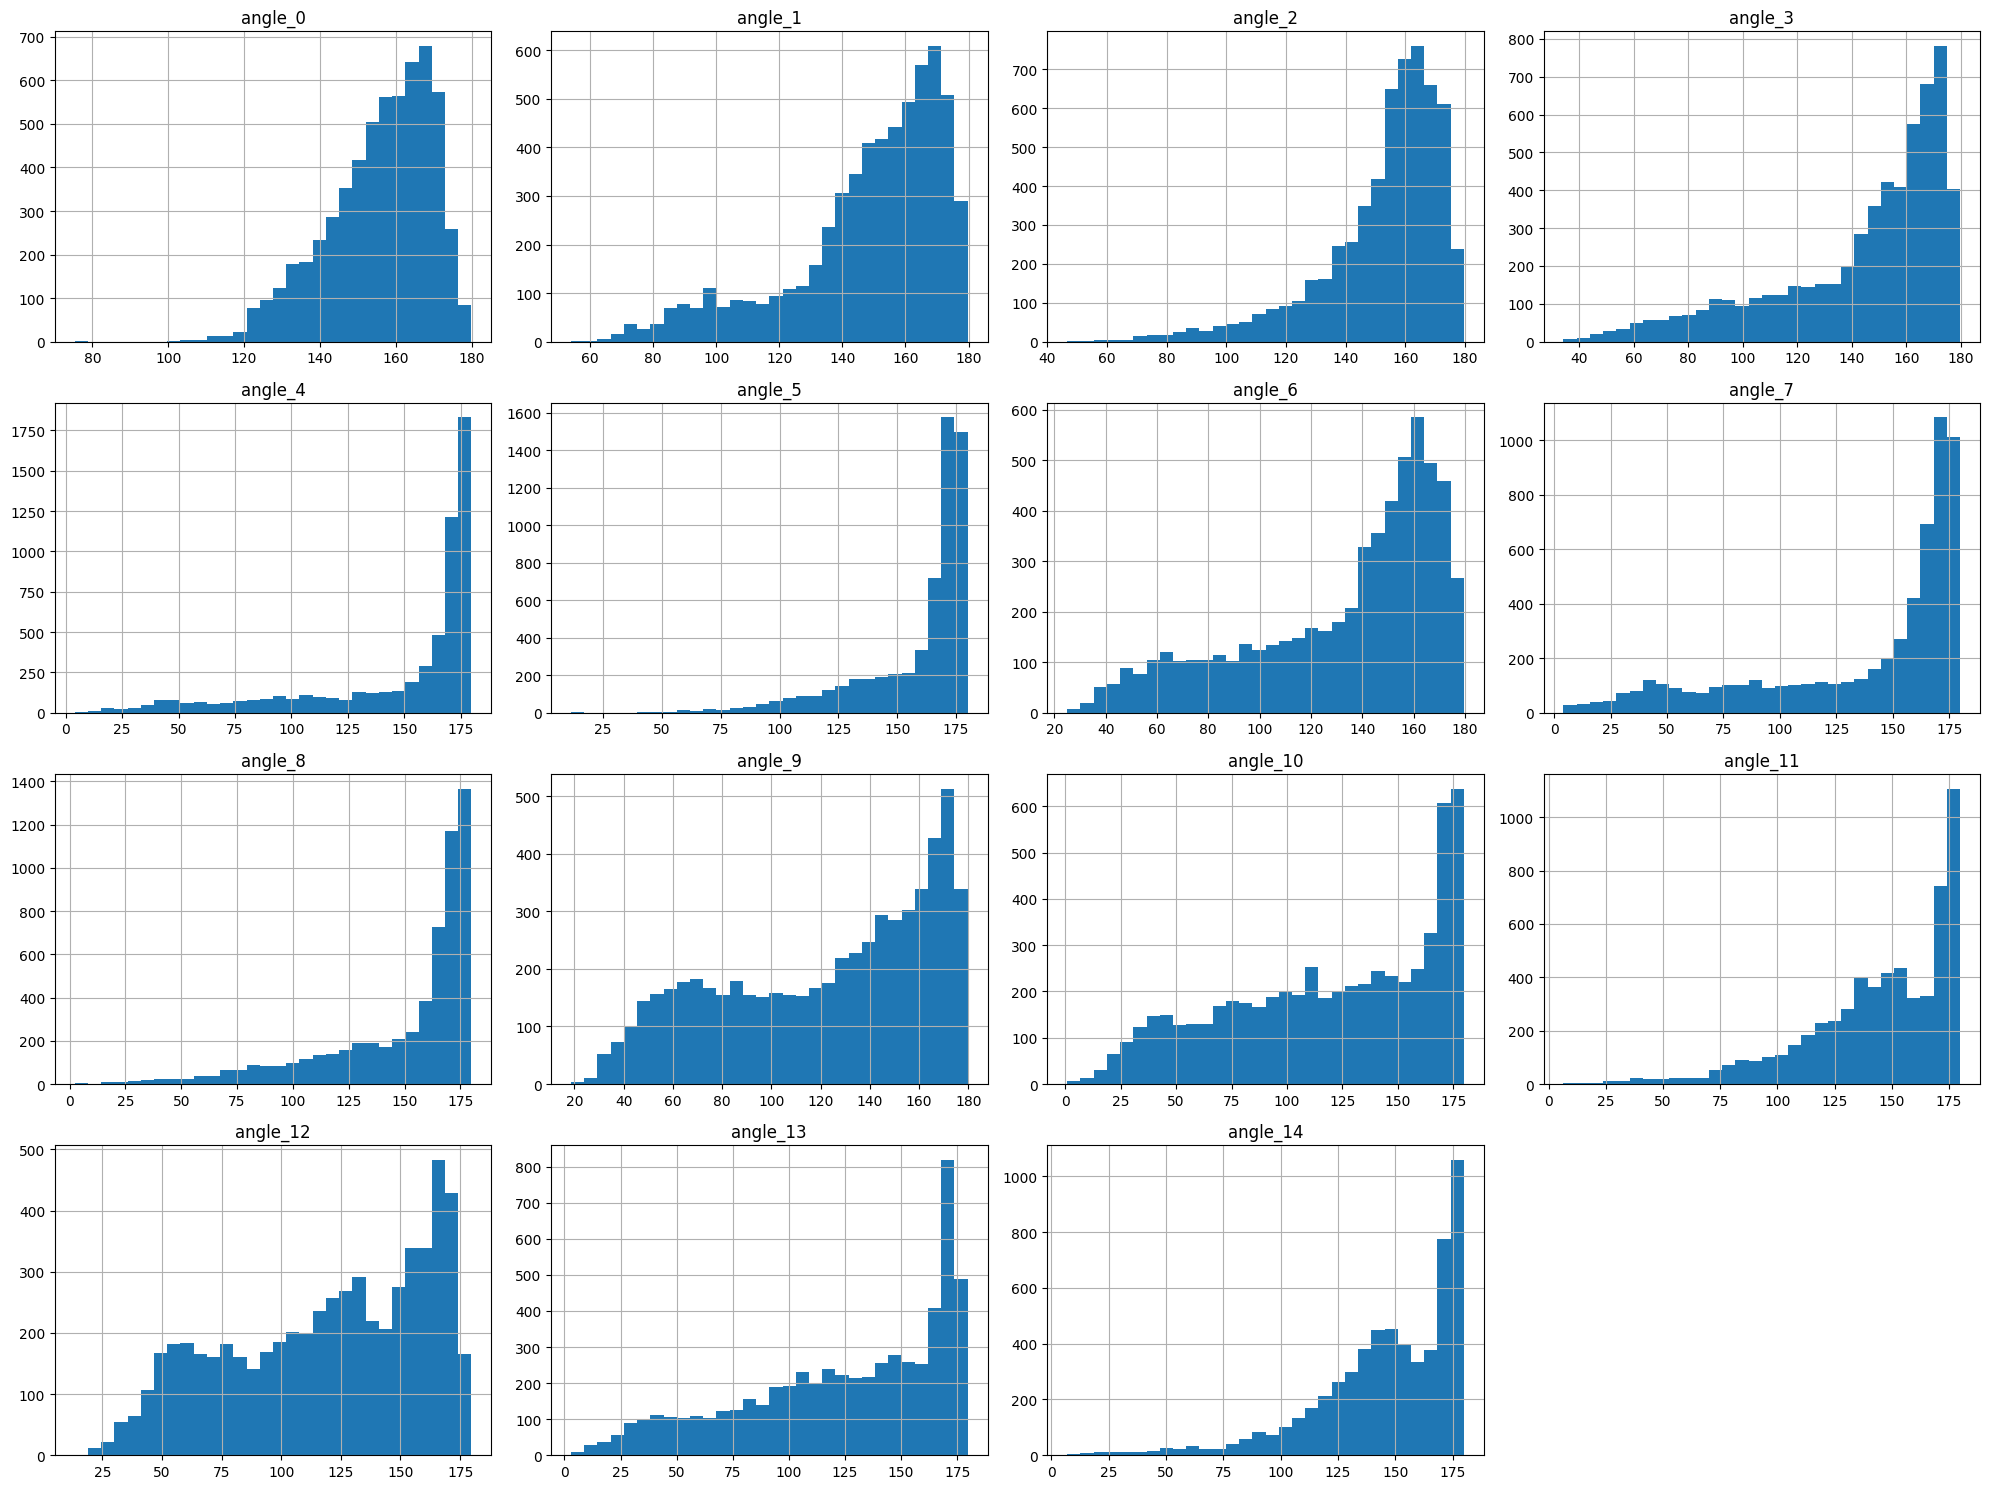

In [14]:
# 3. Angle Distributions
angle_columns = [col for col in df.columns if col.startswith('angle')]
df[angle_columns].hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

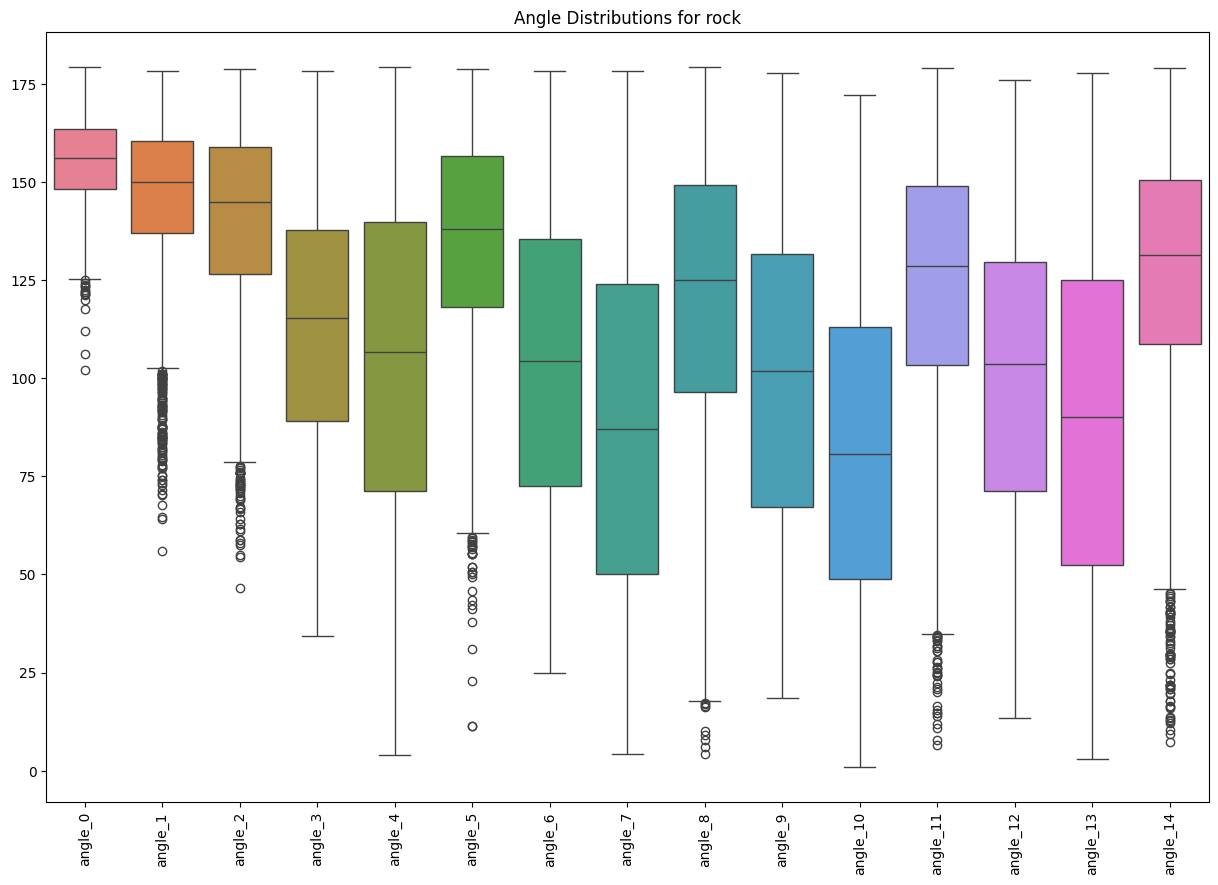

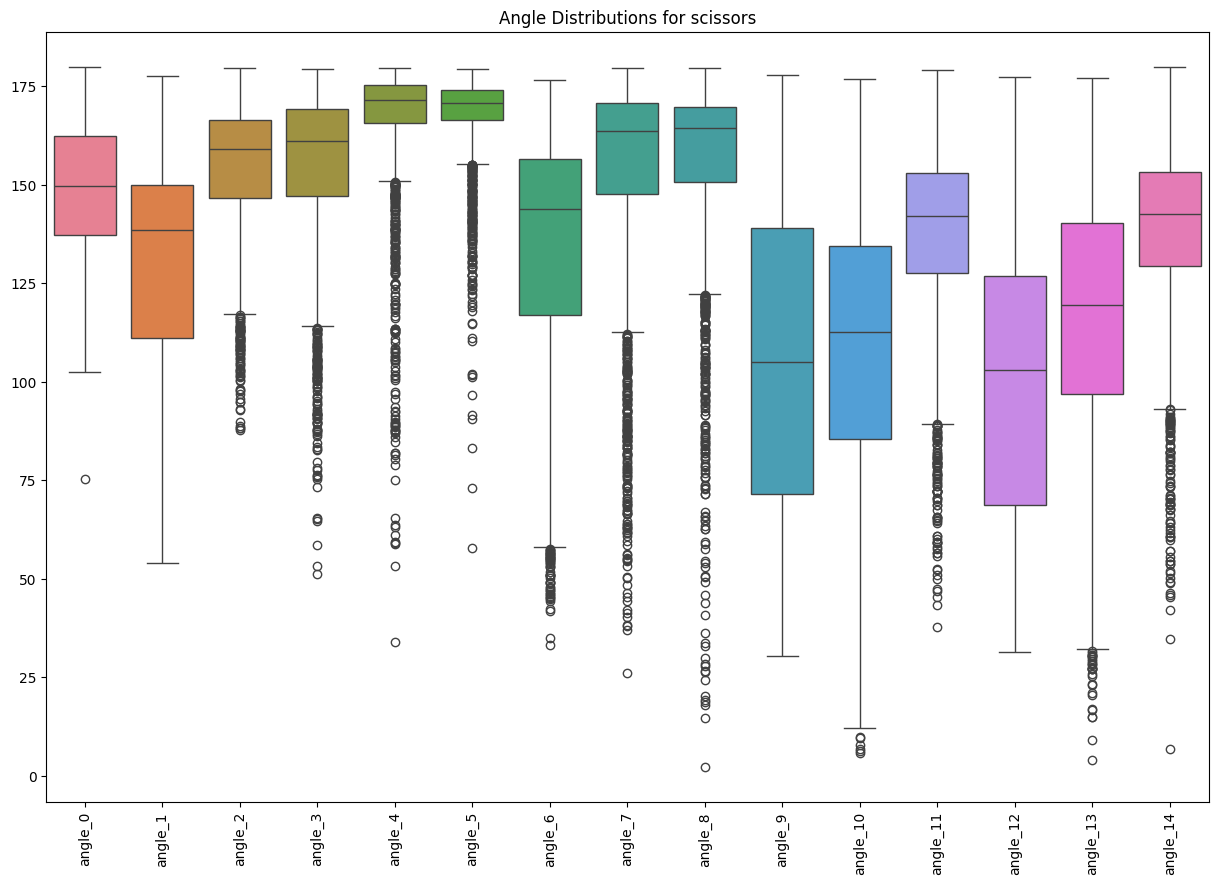

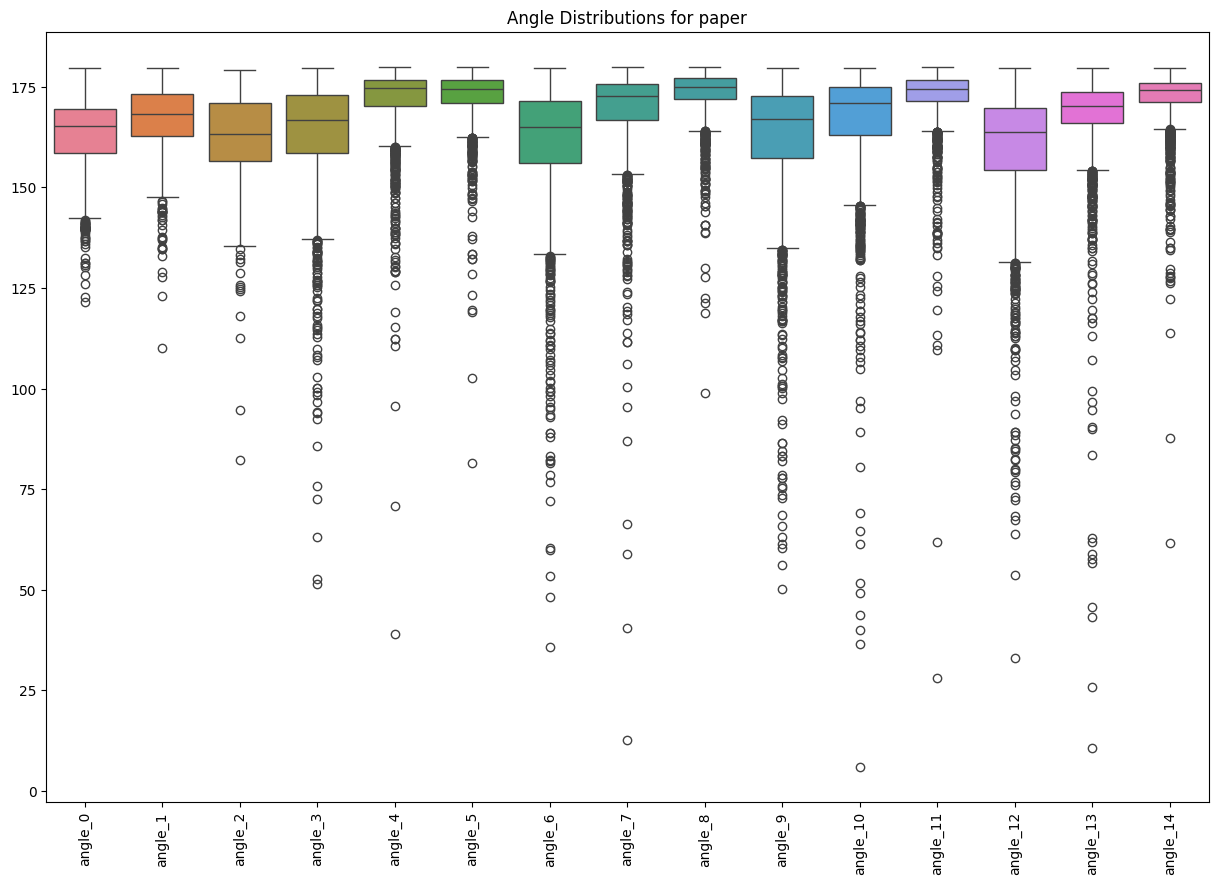

In [15]:
# 5. Gesture-wise Angle Analysis
for gesture in df['gesture'].unique():
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df[df['gesture'] == gesture][angle_columns])
    plt.title(f'Angle Distributions for {gesture}')
    plt.xticks(rotation=90)
    plt.show()

              precision    recall  f1-score   support

       paper       0.96      0.98      0.97       381
        rock       0.93      0.94      0.94       395
    scissors       0.93      0.90      0.92       398

    accuracy                           0.94      1174
   macro avg       0.94      0.94      0.94      1174
weighted avg       0.94      0.94      0.94      1174



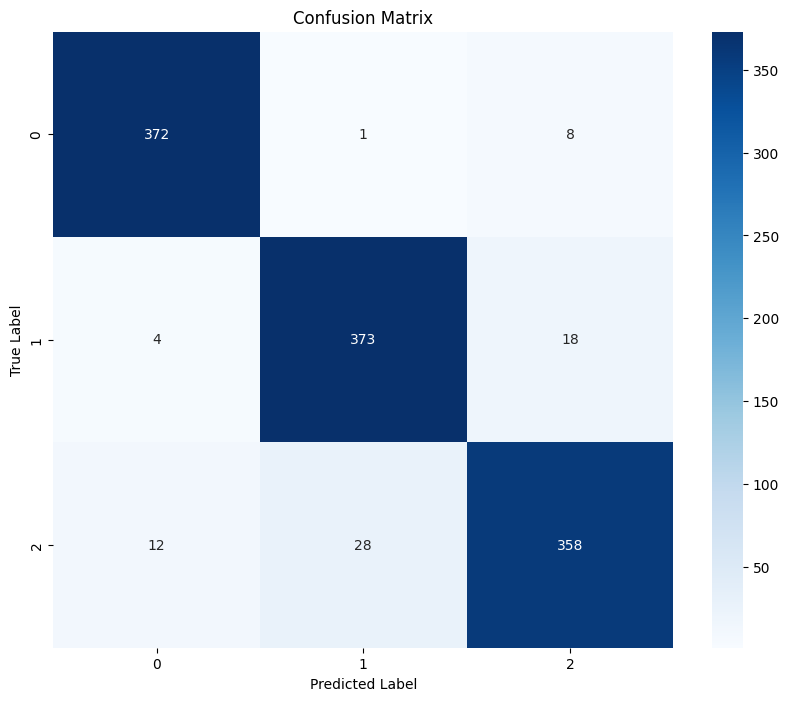

モデルが 'rf_model.pkl' として保存されました。


In [17]:
import joblib


# 7. Simple Machine Learning Model
X = df[angle_columns]
y = df['gesture']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# モデルの保存
joblib.dump(rf_model, 'rf_model.pkl')
print("モデルが 'rf_model.pkl' として保存されました。")

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       paper       0.96      0.98      0.97       381
        rock       0.93      0.94      0.94       395
    scissors       0.93      0.90      0.92       398

    accuracy                           0.94      1174
   macro avg       0.94      0.94      0.94      1174
weighted avg       0.94      0.94      0.94      1174



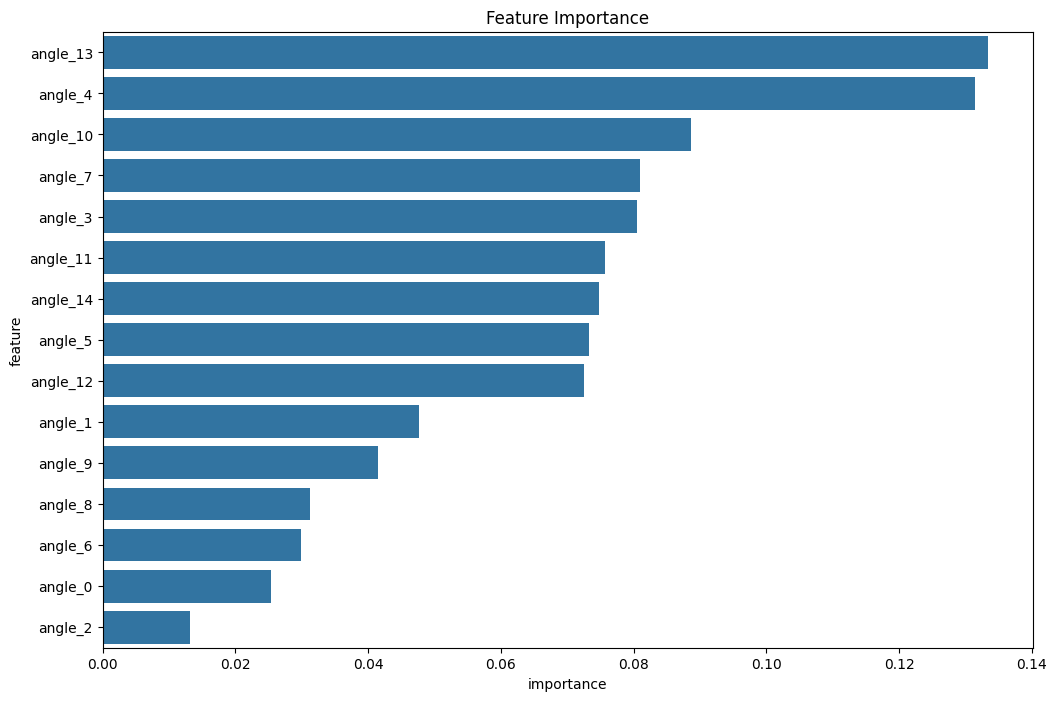

In [19]:
# 8. Feature Importance
feature_importance = pd.DataFrame({
    'feature': angle_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

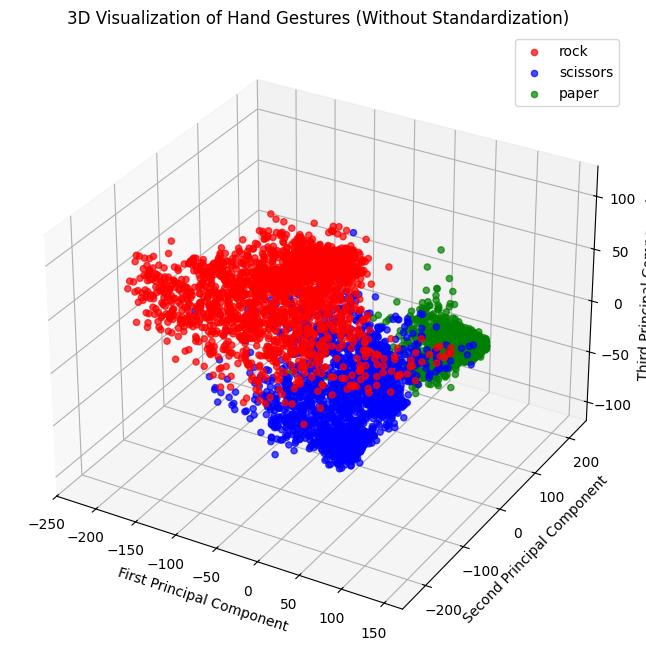

Explained variance ratio: [0.48872821 0.25112523 0.0766386 ]


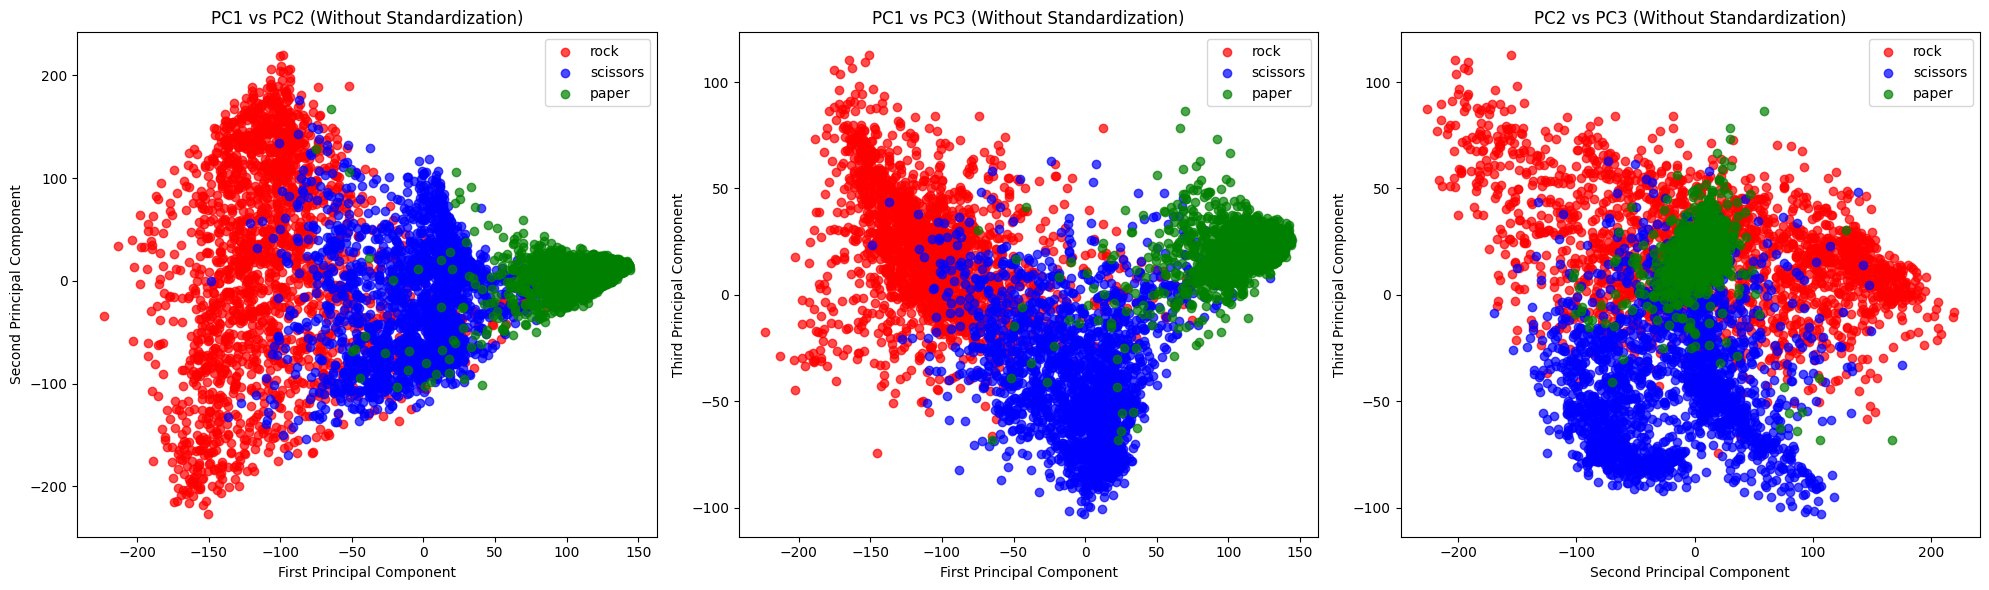

           angle_0      angle_1      angle_2      angle_3      angle_4  \
count  5868.000000  5868.000000  5868.000000  5868.000000  5868.000000   
mean    155.904712   147.945801   152.406812   143.646574   147.498958   
std      13.655788    24.829609    20.563773    31.877661    41.079569   
min      75.347555    53.945893    46.624303    34.229406     3.944096   
25%     147.664879   137.661805   144.312586   126.936599   132.642748   
50%     158.305598   154.438762   157.894791   154.699619   168.959798   
75%     166.756270   166.698415   166.576237   168.196198   175.057477   
max     179.972946   179.734159   179.654110   179.803174   179.818591   

           angle_5      angle_6      angle_7      angle_8      angle_9  \
count  5868.000000  5868.000000  5868.000000  5868.000000  5868.000000   
mean    158.444073   132.507337   137.024600   149.735328   122.163896   
std      24.501098    37.767806    46.436039    33.815104    42.693636   
min      11.288415    25.001018     4

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Select the angle features
angle_columns = [col for col in df.columns if col.startswith('angle')]
X = df[angle_columns]
y = df['gesture']

# Apply PCA without standardization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each class
colors = {'rock': 'r', 'paper': 'g', 'scissors': 'b'}

# Plot each class
for gesture in y.unique():
    mask = y == gesture
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], X_pca[mask, 2], 
               c=colors[gesture], label=gesture, alpha=0.7)

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.legend()
plt.title('3D Visualization of Hand Gestures (Without Standardization)')

plt.show()

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Additional 2D plots for better understanding
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# PC1 vs PC2
for gesture in y.unique():
    mask = y == gesture
    axs[0].scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[gesture], label=gesture, alpha=0.7)
axs[0].set_xlabel('First Principal Component')
axs[0].set_ylabel('Second Principal Component')
axs[0].legend()
axs[0].set_title('PC1 vs PC2 (Without Standardization)')

# PC1 vs PC3
for gesture in y.unique():
    mask = y == gesture
    axs[1].scatter(X_pca[mask, 0], X_pca[mask, 2], c=colors[gesture], label=gesture, alpha=0.7)
axs[1].set_xlabel('First Principal Component')
axs[1].set_ylabel('Third Principal Component')
axs[1].legend()
axs[1].set_title('PC1 vs PC3 (Without Standardization)')

# PC2 vs PC3
for gesture in y.unique():
    mask = y == gesture
    axs[2].scatter(X_pca[mask, 1], X_pca[mask, 2], c=colors[gesture], label=gesture, alpha=0.7)
axs[2].set_xlabel('Second Principal Component')
axs[2].set_ylabel('Third Principal Component')
axs[2].legend()
axs[2].set_title('PC2 vs PC3 (Without Standardization)')

plt.tight_layout()
plt.show()

# Display summary statistics of the angle features
print(X.describe())

# Check for any angles outside the 0-180 range
out_of_range = X[(X < 0) | (X > 180)].count()
if out_of_range.sum() > 0:
    print("Warning: Some angles are outside the 0-180 range:")
    print(out_of_range[out_of_range > 0])
else:
    print("All angles are within the 0-180 range.")